In [1]:
getwd()

[1] "C:/Users/karel"

In [2]:
setwd("C:/Users/karel/OneDrive/Documents/Meine Unterlagen/Skool/Meine_Vorhaben/R/data_set")

In [3]:
 wh <- read.csv("worldHappinessReport.csv")

We do a data cleaning

In [4]:
wh$Happiness = as.numeric(wh$Happiness)
wh$GDP = as.numeric(wh$GDP)
wh$SocialSupport = as.numeric(wh$SocialSupport)
wh$Health = as.numeric(wh$Health)
wh$Freedom = as.numeric(wh$Freedom)
wh$Generosity = as.numeric(wh$Generosity)
wh$Corruption = as.numeric(wh$Corruption)
wh$PositiveAffect = as.numeric(wh$PositiveAffect)
wh$NegativeAffect = as.numeric(wh$NegativeAffect)
wh$ConfidenceInGovernment = as.numeric(wh$ConfidenceInGovernment)

In [5]:
summary(wh)

       X                Country      Happiness          GDP        
 Min.   :  1.0   Afghanistan:  1   Min.   :2.662   Min.   : 6.494  
 1st Qu.: 37.5   Albania    :  1   1st Qu.:4.619   1st Qu.: 8.457  
 Median : 74.0   Algeria    :  1   Median :5.553   Median : 9.492  
 Mean   : 74.0   Argentina  :  1   Mean   :5.460   Mean   : 9.298  
 3rd Qu.:110.5   Armenia    :  1   3rd Qu.:6.252   3rd Qu.:10.279  
 Max.   :147.0   Australia  :  1   Max.   :7.788   Max.   :11.454  
                 (Other)    :141                   NA's   :4       
 SocialSupport        Health         Freedom         Generosity       
 Min.   :0.3196   Min.   :45.20   Min.   :0.4270   Min.   :-0.291227  
 1st Qu.:0.7335   1st Qu.:58.70   1st Qu.:0.7130   1st Qu.:-0.136935  
 Median :0.8286   Median :66.00   Median :0.8125   Median :-0.030673  
 Mean   :0.8052   Mean   :64.19   Mean   :0.7806   Mean   :-0.007056  
 3rd Qu.:0.9053   3rd Qu.:68.90   3rd Qu.:0.8841   3rd Qu.: 0.101768  
 Max.   :0.9668   Max.   :76.5

In [8]:
summary(wh$GDP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  6.494   8.457   9.492   9.298  10.279  11.454       4 

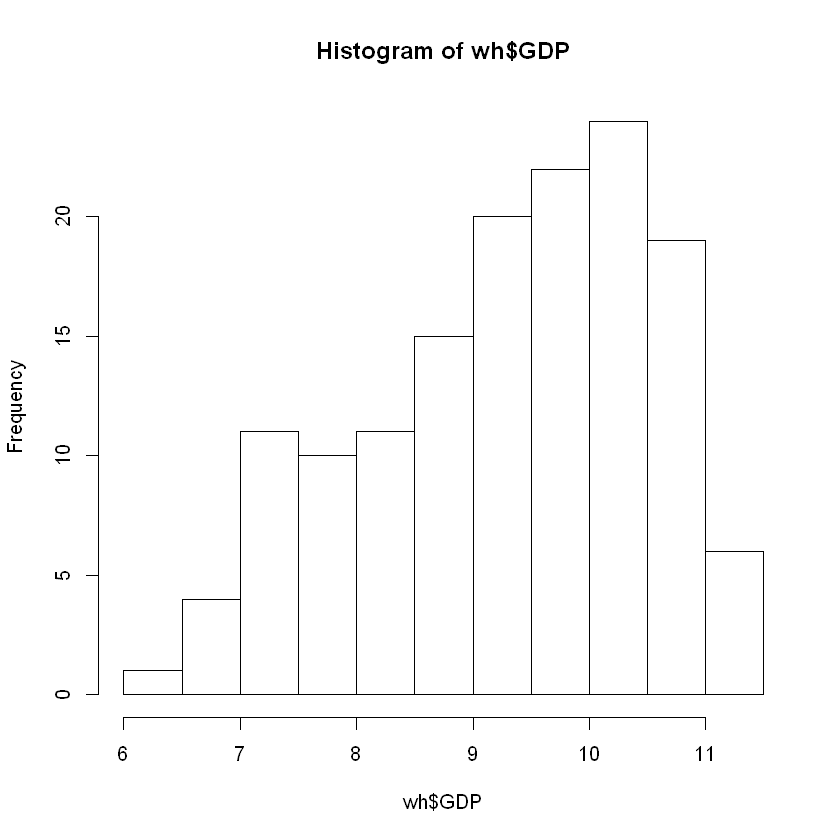

In [9]:
hist(wh$GDP)


Nous observons que nous avons très peut de pays ayant un GDP de 6 dollar se qui peut etre 

cosiderer comme une donnée aberrantes. 


D'après le diagram si déssus le variable GDP peut suivre une lois normal.

Nous allons éffectuer un test de normalité pour vérifier notre hypothèse 


In [10]:
shapiro.test(wh$GDP)


	Shapiro-Wilk normality test

data:  wh$GDP
W = 0.96199, p-value = 0.000539


Le test de normalié de Shapiro_Wilk que nous venons d'éfectuer nous montre que le 

p-value est inférieur 0,05 donc GDP ne suis pas la loi normal

In [11]:
t.test(wh$GDP,conf.level=0.9)$conf.int

[1] 9.132107 9.464388
attr(,"conf.level")
[1] 0.9

Nous obtenons l’intervalle de confiance [9.132107 ; 9.464388] de niveau de
confiance 0.9 pour la moyenne.
Se qui signifie que nous avons 90% de change d'avoir une moyenne dans cette intervale

In [17]:
library(dplyr)
install.packages("remotes") 


  There is a binary version available but the source version is later:
        binary source needs_compilation
remotes  2.3.0  2.4.2             FALSE



installing the source package 'remotes'



In [18]:
# Nous obtenons les 10 pays avec les plus grand GQD
slice_max(wh, GDP, n=10)

ERROR: Error in slice_max(wh, GDP, n = 10): impossible de trouver la fonction "slice_max"


In [19]:
wh_m = wh%>%
  group_by(Region)%>%
  summarize(mean(GDP, na.rm=TRUE))
wh_m

Region,"mean(GDP, na.rm = TRUE)"
Australia and New Zealand,10.600119
Central and Eastern Europe,9.611540
Eastern Asia,10.202102
Latin America and Caribbean,9.305069
Middle East and Northern Africa,9.938445
North America,10.796625
Southeastern Asia,9.204281
Southern Asia,8.353837
Sub-Saharan Africa,7.862872
Western Europe,10.683490


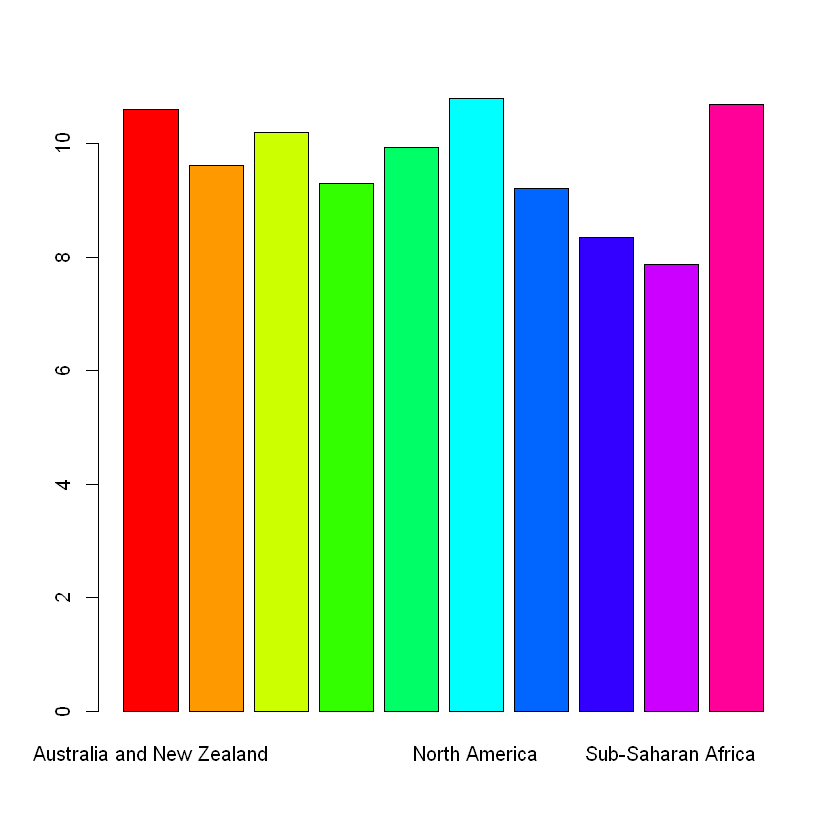

In [20]:
barplot(c(by(data = wh$GDP, INDICES = wh$Region, FUN  = mean, na.rm = T)), col = rainbow(10),)

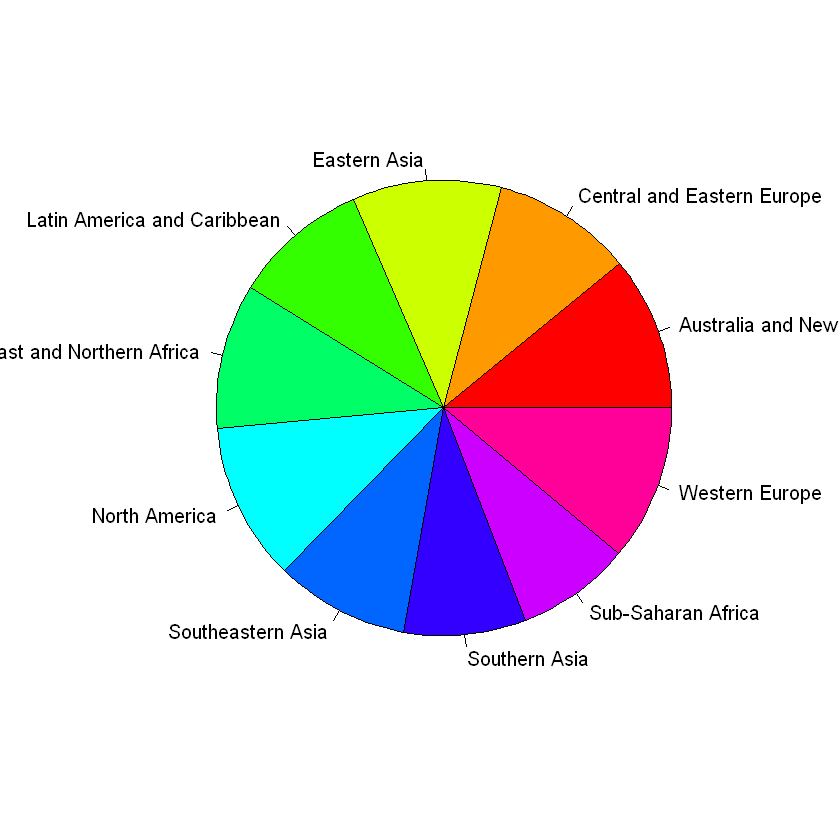

In [21]:
pie(c(by(data = wh$GDP, INDICES = wh$Region, FUN  = mean, na.rm = T)), col = rainbow(10),)

Nous constatons que la moyenne des GDP dans les differentes regions du mondes est diférent

et qu'elle est particuierement faible e afrique sub-saharien avec une moyenne de 7.86 

dollar et  une moyenne supérieur a 10 dollar en Amerique du north, en europe de l'ouest et 
Australie et Nouvelle zeland

In [22]:
table(wh$Region)


      Australia and New Zealand      Central and Eastern Europe 
                              2                              29 
                   Eastern Asia     Latin America and Caribbean 
                              6                              21 
Middle East and Northern Africa                   North America 
                             18                               2 
              Southeastern Asia                   Southern Asia 
                              8                               6 
             Sub-Saharan Africa                  Western Europe 
                             35                              20 

In [23]:
prop.table(table(wh$Region))


      Australia and New Zealand      Central and Eastern Europe 
                     0.01360544                      0.19727891 
                   Eastern Asia     Latin America and Caribbean 
                     0.04081633                      0.14285714 
Middle East and Northern Africa                   North America 
                     0.12244898                      0.01360544 
              Southeastern Asia                   Southern Asia 
                     0.05442177                      0.04081633 
             Sub-Saharan Africa                  Western Europe 
                     0.23809524                      0.13605442 

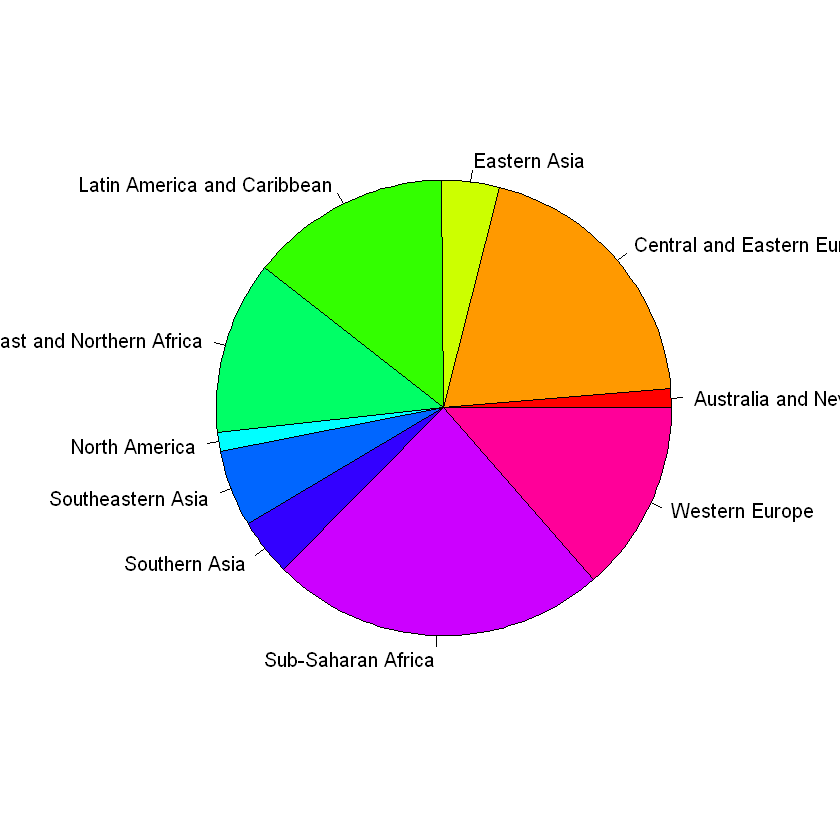

In [24]:
pie(table(wh$Region), col=rainbow(10))

Nous remarquon que l'armerique du nord et l'autralie et la nouvelle zelande sont très peu 

réprésenté, par contre l'afrique,l'europe sont assez bien réprésenté. Se graphique nous 

montre le nombre de pays impliqué dans se sondage


In [25]:
summary(wh$PositiveAffect, na.rm=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.4210  0.6148  0.7207  0.7050  0.7936  0.9028       1 

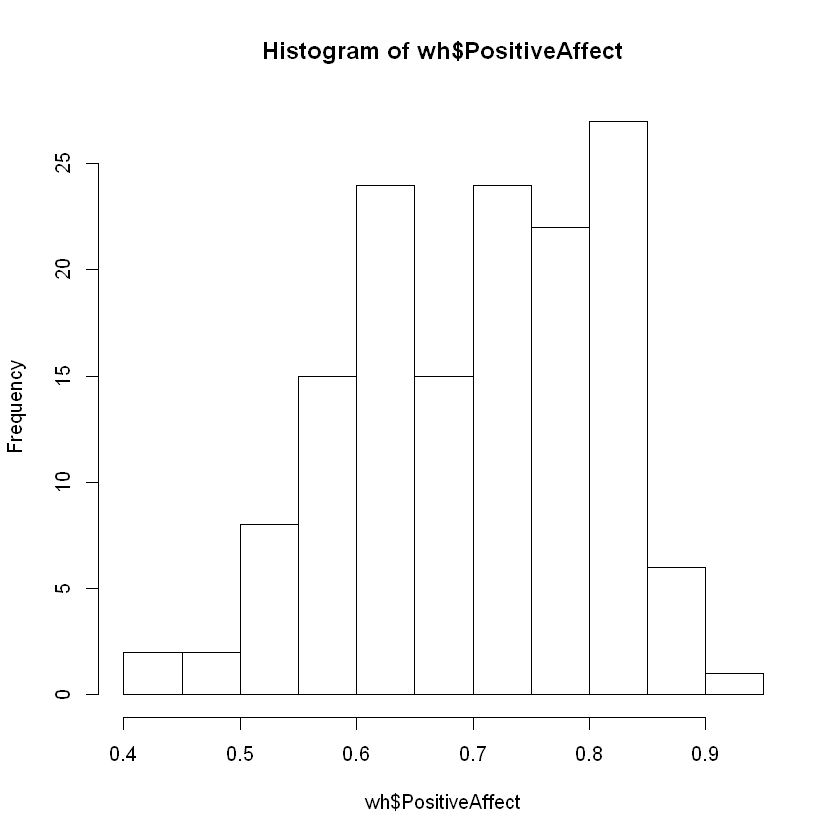

In [26]:
hist(wh$PositiveAffect)

numeric(0)

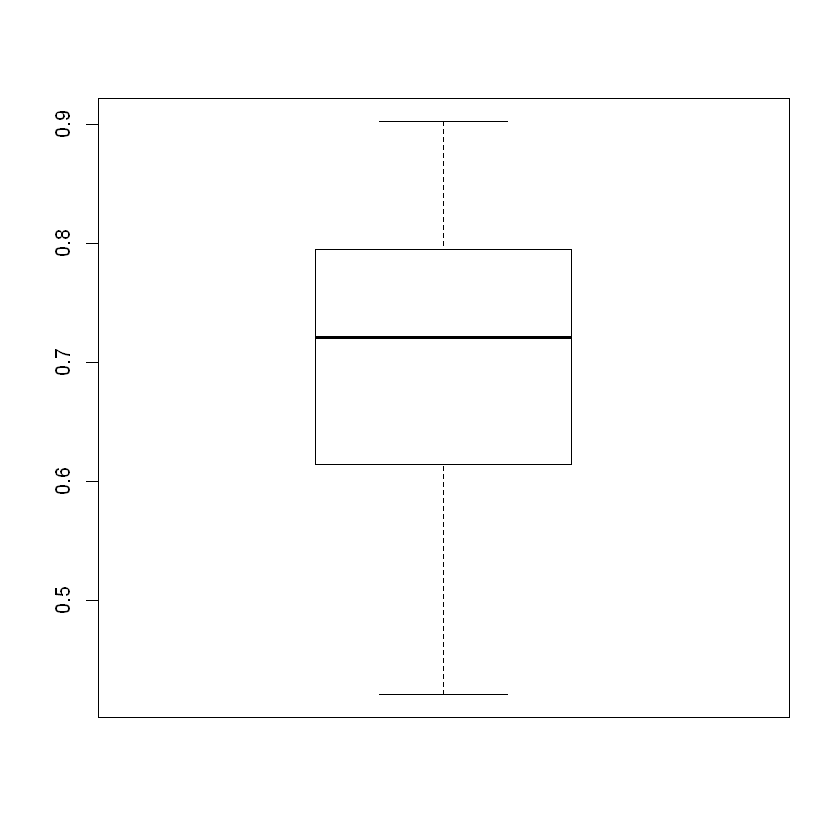

In [27]:
boxplot(wh$PositiveAffect)$out

Le boxplot et le histogral ci-dessus nous montre que le variable positive effetct n'a pas 

de données aberantes se qui nous indique qu'il n'y a pas de région ou de pays où la 

valeur de positive effect est très petite en comparaison aux autre pays. 

In [28]:
summary(wh$NegativeAffect)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1141  0.2244  0.2790  0.2912  0.3483  0.5993       1 

[1] 0.5993355 0.5382454 0.5905387

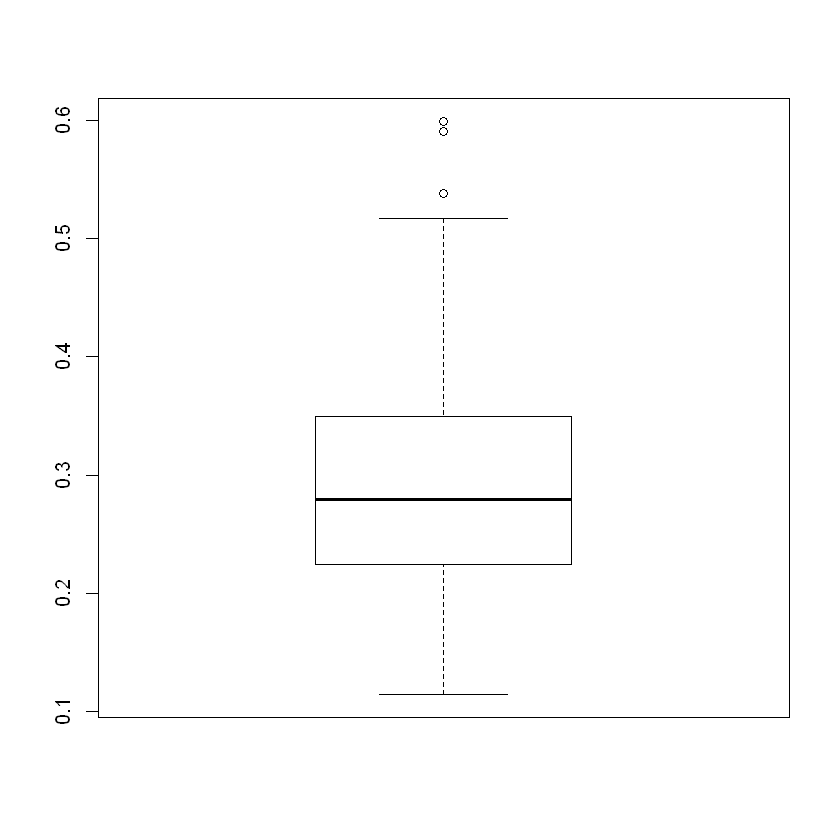

In [29]:
boxplot(wh$NegativeAffect)$out

Nous avons trois valeur aberants qui sont  0.5993355, 0.5382454, 0.5905387

Et nous pouvons verifier sa avec un histogram

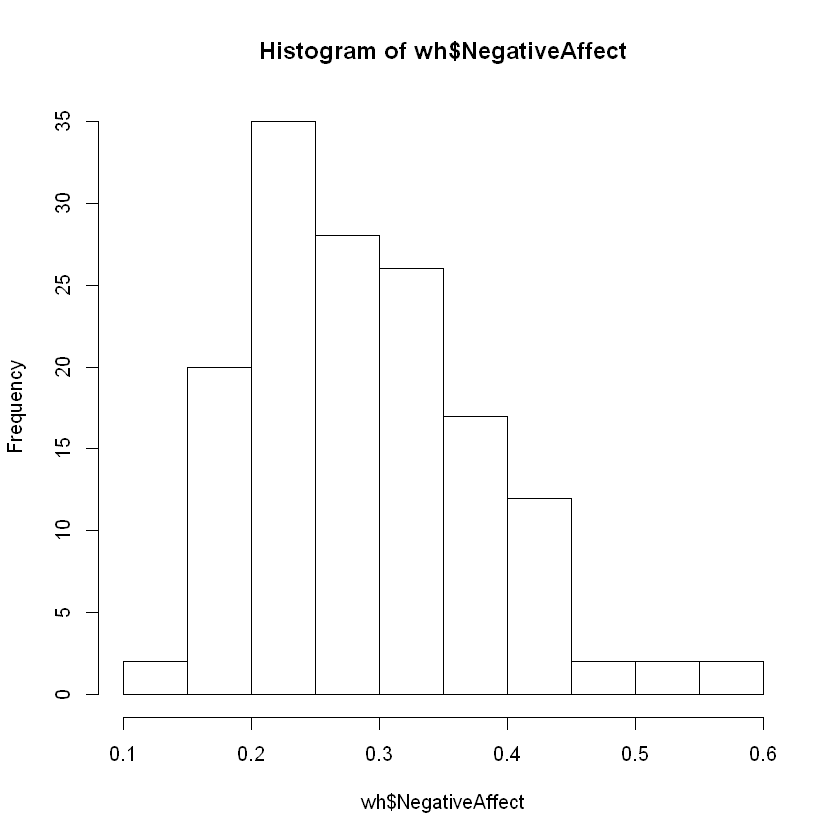

In [30]:
hist(wh$NegativeAffect)

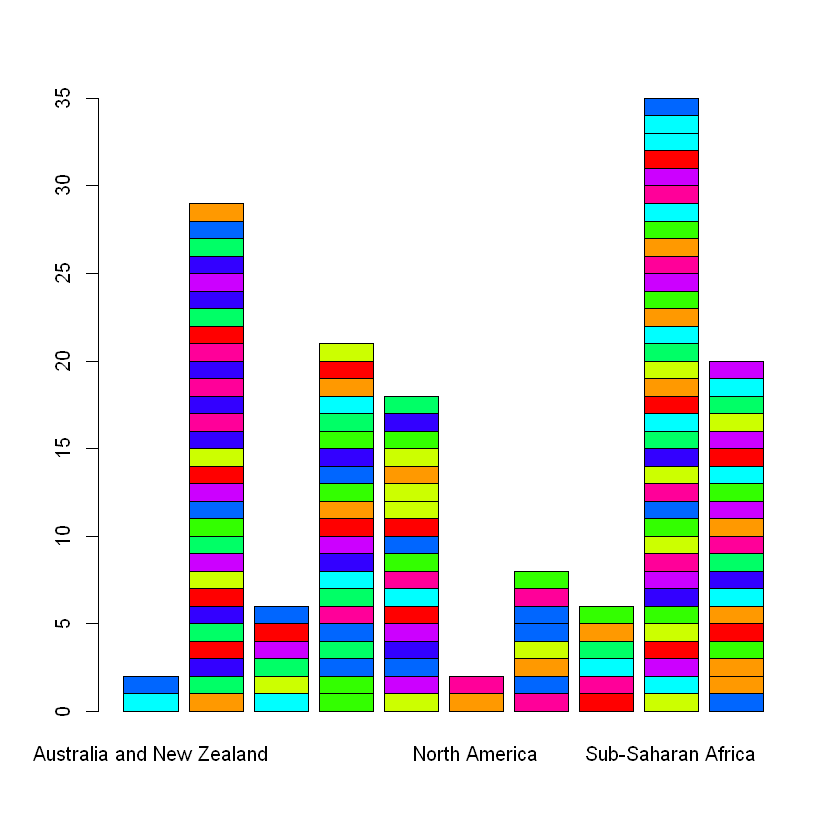

In [31]:
trg = table(wh$Country,wh$Region)
barplot(trg, col = rainbow(10))

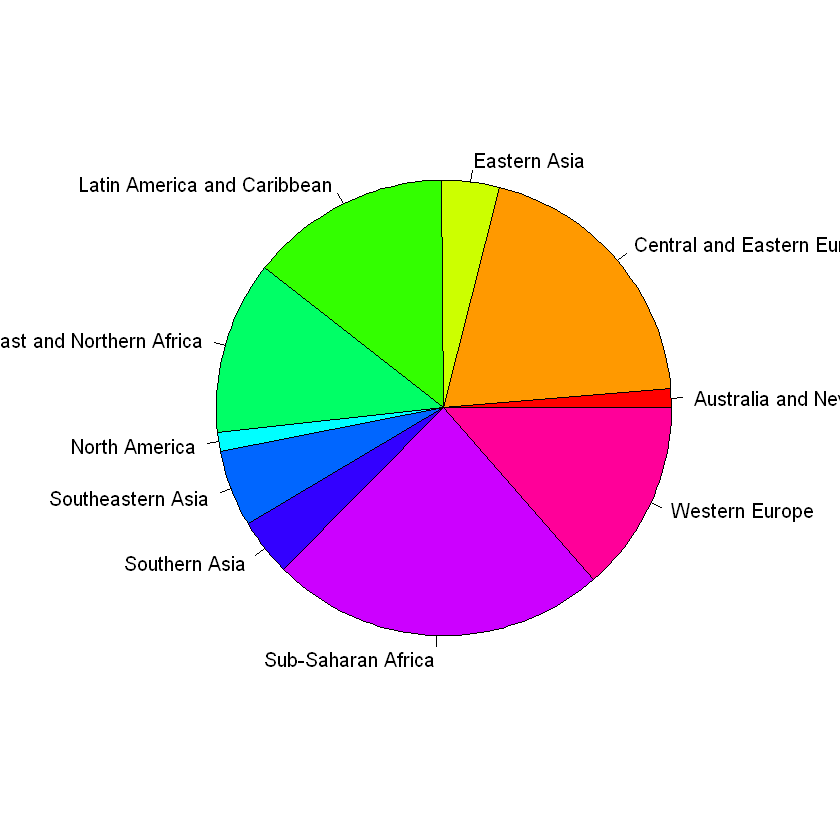

In [32]:
pie(table(wh$Region), col = rainbow(10))

Le diagram de bar est ci-dessus accompagner du diagram circulaie nous permet ne mieux 

comprendre la rélation entre les pays et ls régions. 


In [33]:
chisq.test(trg)

Warning message in chisq.test(trg):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  trg
X-squared = 1323, df = 1314, p-value = 0.4254


Le p-value = 0.4254 > 0.05 se qui nous dit qu'il n'y a pas de lien entre les pays 

et les régions dans le context de cette étude. 

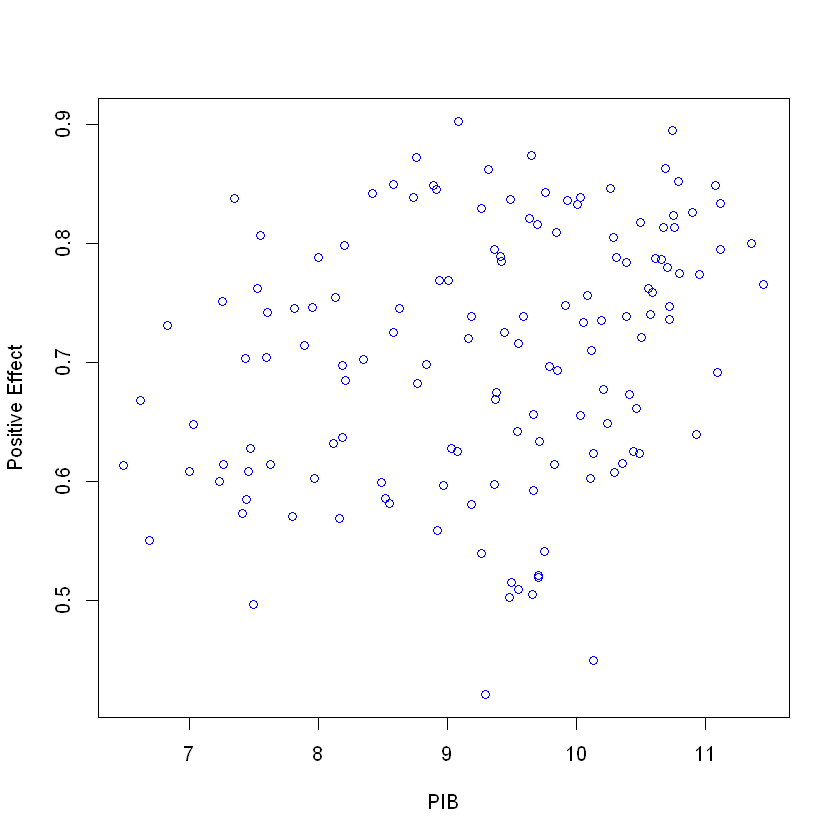

In [36]:

plot(wh$GDP, wh$PositiveAffect,
     xlab="PIB",
     ylab= "Positive Effect",
     col = "blue" )

Nous observons une relations entre PIB et positive effect. Mais le nuage de points que 

nous avons ne nous permet pas de faait une conclusion quand la qualité de la rélation 

qu'ils ont Nous allons donc éffectuer un test de dépendence pour voir s'il y'a une lien 

entre ses deux variables


In [37]:
cor.test(wh$GDP, wh$PositiveAffect)


	Pearson's product-moment correlation

data:  wh$GDP and wh$PositiveAffect
t = 3.4125, df = 140, p-value = 0.0008419
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1177614 0.4225517
sample estimates:
      cor 
0.2771131 


Après avoir éffectuer un test de corrélation , nous obtenons un valeur de 0.277 qui 

indique un faible rapport entre le bohneur des population et le PIB. 


Et nous pouvons déduire que la bonne hummeus des populations dans les differente 

régions ne dépand pas de leurs pouvoir d'achat

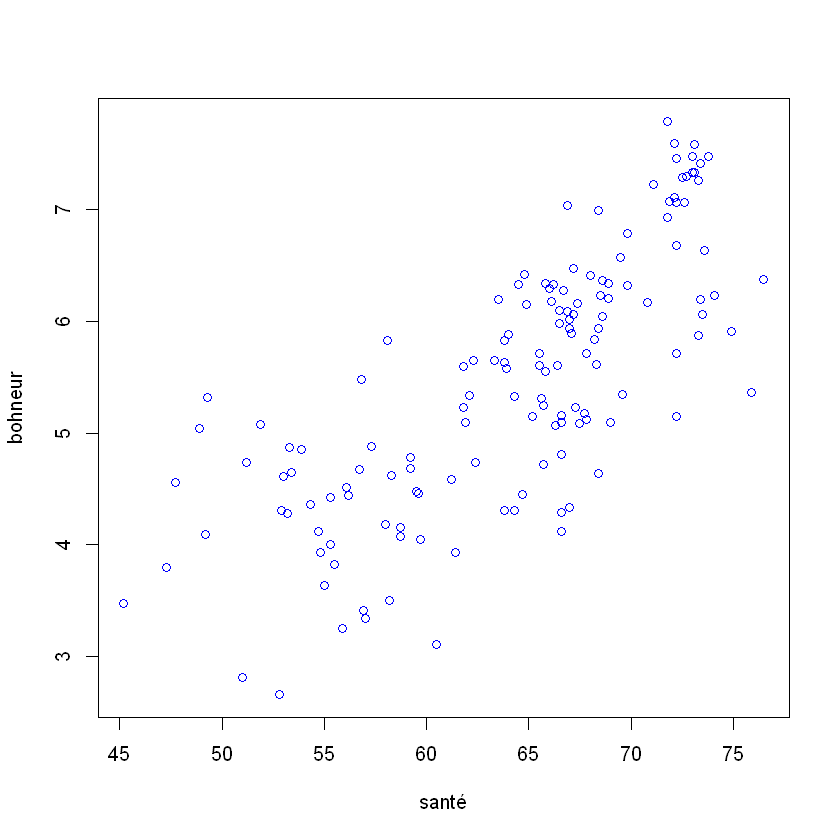

In [39]:
plot(wh$Health, wh$Happiness,
     xlab="santé",
     ylab= "bohneur",
     col = "blue" )

Nous constatons qu'il y'a une assez forte relation entre la santé des popultions dans les 


différentes région et leur bohneur. Nous allons éffetuer un test de correlation pour 

vérifier cette interpretation

In [41]:
cor.test(wh$Health, wh$Happiness)


	Pearson's product-moment correlation

data:  wh$Health and wh$Happiness
t = 13.918, df = 143, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6795021 0.8201061
sample estimates:
      cor 
0.7584964 


Se test de correlation nous donne une valeur de 0,758 se qui est assez proch de 1 et nous 

pouvons donc en déduire que le bohneur des populations dans les différentes région 

est fortement lié a leurs santé.

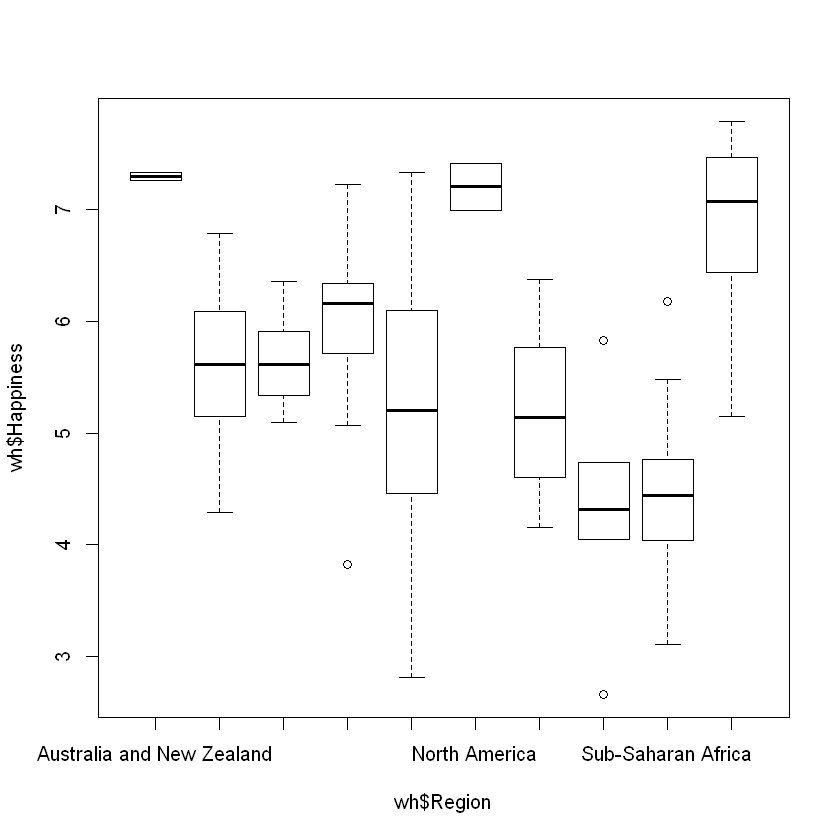

In [43]:
boxplot(wh$Happiness~wh$Region)

Le graphique nous montre une association entre les regions et le bonheur des habitants 

de ses regions. Nous allons confimer notre suposition avec un test de anova 

In [44]:
anova(aov(wh$Happiness~wh$Region))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
wh$Region,9,110.26614,12.2517931,21.04562,5.880809e-22
Residuals,137,79.75509,0.5821539,NA,NA


Le test de Anova effcetuer si dessus nous montre qu'il y a une association entre les 

regions et le bonheur. Donc nous pouvons dire que le bohneur d'une personne dépend de 

là où cette personne vie.


L'nalyse si dessus nous montre que hapinness est lié au regions. 

Nous avons aussi vu que happiness est fortement lié a la santé(health)


Nous allons étudié les association entre health et social support, freedom, corruption, 

et confidence in government


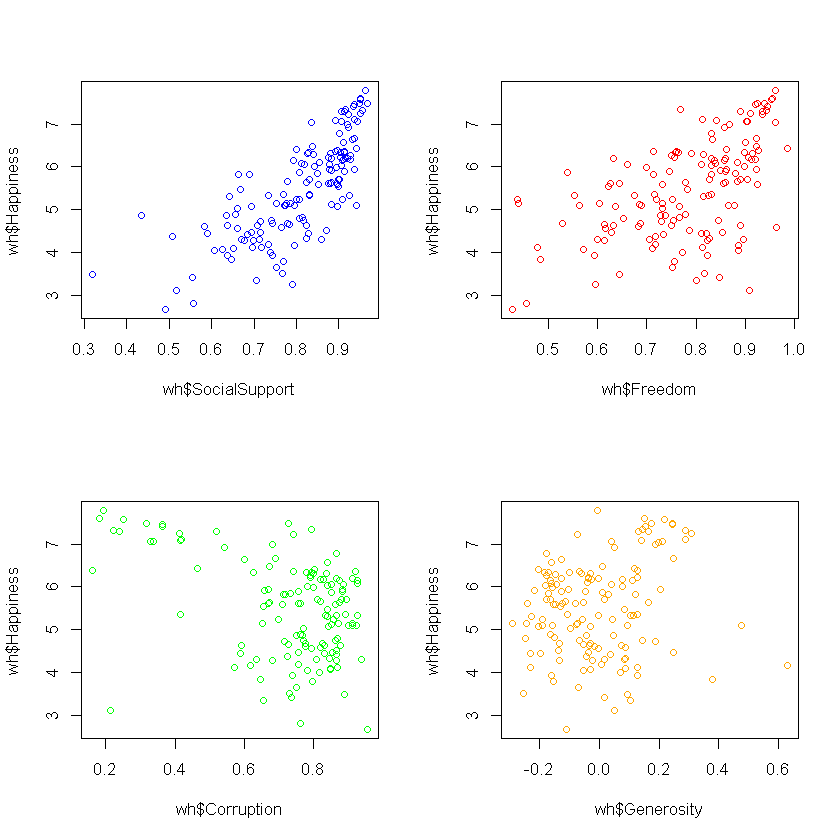

In [47]:
par(mfrow=c(2,2)) 

plot(wh$SocialSupport, wh$Happiness,
     col = "blue" )

plot(wh$Freedom, wh$Happiness,
     col = "red" )

plot(wh$Corruption, wh$Happiness,
     col = "green" )

plot(wh$Generosity, wh$Happiness,
     col = "orange"  )

En observant les graphiqes ci dessus nous observons qu'il peut avoir une relation entre 

hapiness et social support ainsi etre hapiness et freedom. 

La rélation entre happines et corruption et happiness et generosity n'est pas très claire.

Nous allons verifier sa avec des test de correlation

In [48]:
cor.test(wh$Happiness,wh$SocialSupport)
cor.test(wh$Happiness,wh$Freedom)
cor.test(wh$Happiness,wh$Generosity)
cor.test(wh$Happiness,wh$Corruption)


	Pearson's product-moment correlation

data:  wh$Happiness and wh$SocialSupport
t = 14.102, df = 144, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6837208 0.8222967
sample estimates:
      cor 
0.7615809 



	Pearson's product-moment correlation

data:  wh$Happiness and wh$Freedom
t = 7.5959, df = 144, p-value = 3.55e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4078321 0.6415532
sample estimates:
      cor 
0.5348461 



	Pearson's product-moment correlation

data:  wh$Happiness and wh$Generosity
t = 2.1123, df = 140, p-value = 0.03643
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01134814 0.33089466
sample estimates:
      cor 
0.1757469 



	Pearson's product-moment correlation

data:  wh$Happiness and wh$Corruption
t = -5.3764, df = 134, p-value = 3.278e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5505304 -0.2722026
sample estimates:
       cor 
-0.4212343 


Les test de correlation nous montre qu'il y a une forte correlation entre happiness et 

social support et suivi par la rélation entre hapiness et freedom. 

La rélation entre happiness et genersity est assez faible et celle entre 

happiness et corruption est negative. 

Nous pouvont conclure que plus les gens soont assister socialement et libre plus il se 

sente heureux. Par contre la genenorité n'a pas un impact fort sur le bohneur des gens. 

Nous remarquon aussi que la corruption a un impact negatives sur le bohneur des population

raison pour laquelle on a eu une correlation negative.

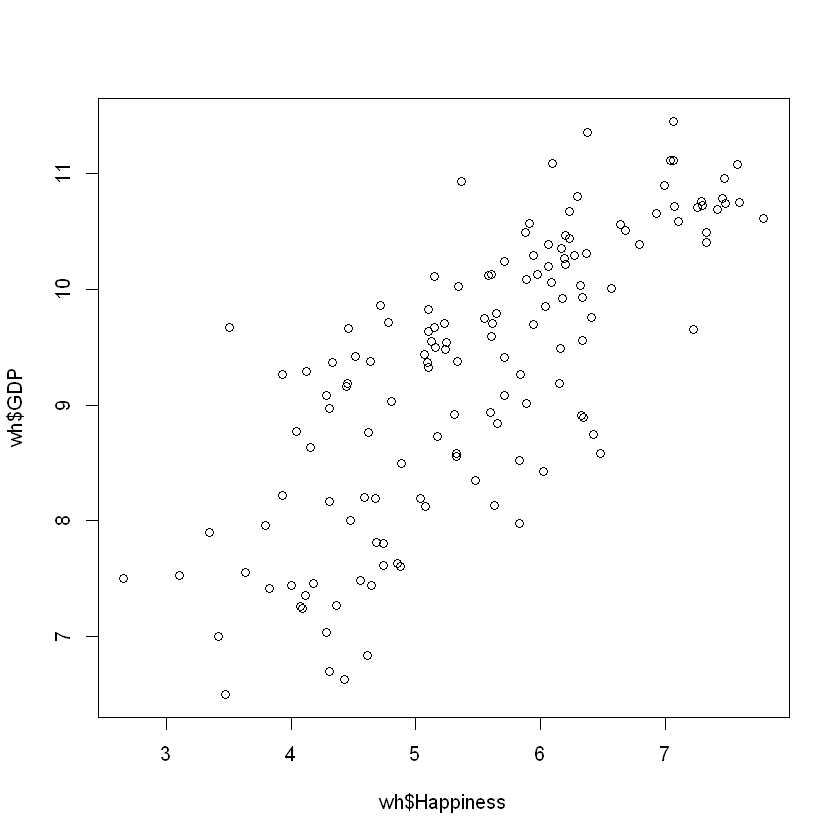

In [49]:
plot(wh$Happiness,wh$GDP)


Le graphique nous montre une relation entre happiness et GDP se qui nous montre qu'une

regression linear peur etre une bonne idée dans cette situation 

In [50]:
rl = lm(wh$Happiness~wh$GDP, data=wh)
summary(rl)


Call:
lm(formula = wh$Happiness ~ wh$GDP, data = wh)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.25313 -0.48670  0.02848  0.50024  1.49561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.14430    0.46942  -2.438    0.016 *  
wh$GDP       0.71392    0.05007  14.258   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.716 on 141 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5905,	Adjusted R-squared:  0.5875 
F-statistic: 203.3 on 1 and 141 DF,  p-value: < 2.2e-16


L'équation de la droite est:

Happiness = -1.14430 + 0.71392*GDP


La valeur de R-square nous dit dit que le PIB peut prédire le bohneur des population

avec une précision de 59%. Se qui nous montre un lien entre le PIB et le bohneur. 

Mais le p-value qui est plus petit que 0.05 nous montre que la valeur de le GDP

ne prédit pas très bien le bohneur.
Nous allons maintenant éffectuer une régression mutilple

In [51]:
mlr = lm(wh$Happiness~wh$Freedom+wh$SocialSupport+wh$Corruption+wh$Generosity, data = wh)
summary(mlr)


Call:
lm(formula = wh$Happiness ~ wh$Freedom + wh$SocialSupport + wh$Corruption + 
    wh$Generosity, data = wh)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8098 -0.3824  0.0400  0.4437  1.7140 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.40334    0.65683   0.614  0.54026    
wh$Freedom        1.36432    0.56313   2.423  0.01680 *  
wh$SocialSupport  6.02754    0.50963  11.827  < 2e-16 ***
wh$Corruption    -1.15284    0.37273  -3.093  0.00243 ** 
wh$Generosity    -0.03457    0.40704  -0.085  0.93246    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6675 on 128 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.6622,	Adjusted R-squared:  0.6516 
F-statistic: 62.73 on 4 and 128 DF,  p-value: < 2.2e-16


Le résultat de cette régréssion mutilple nous montre que les generosity, freedom, 

corruption et socialsupport mis ensemble predit hapinnes moin bien que generosity seul.

Mais ses parametre mis ensemble on un meilleur R-square value que GDP seul.

Nous pouvons alors en déduire que un des facteur les plus pertinent pour le bohneur 

des population c'est la générosité